In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.cluster import KMeans

In [5]:
df=pd.read_csv('Wholesale customers data.csv')

In [6]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
df.shape

(440, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [10]:
def minmax(x):
    xs = (x - x.min())/(x.max() - x.min()) 
    return xs

In [11]:
df_new=minmax(df)

In [12]:
df_new.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [13]:
sse=[]
k_range=range(1,30)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df_new)
    sse.append(km.inertia_)

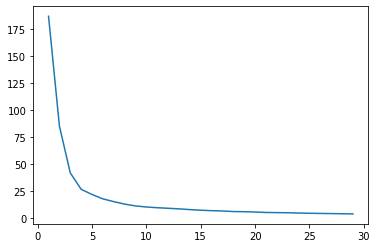

In [14]:
plt.plot(k_range,sse)
plt.show()

In [15]:
sse=[]
k_range=range(1,10)
for k in k_range:
    cls=KMeans(n_clusters=k)
    cls.fit(df_new)
    sse.append(cls.inertia_)

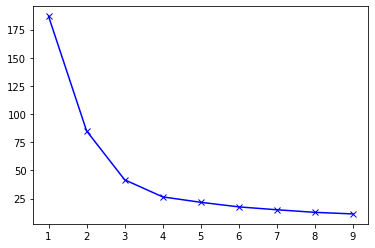

In [16]:
plt.plot(k_range,sse,'bx-')
plt.show()

In [17]:
km=KMeans(n_clusters=3)

In [18]:
Y_pred=km.fit_predict(df_new)

In [19]:
Y_pred

array([2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2,

In [20]:
df['Clusters']=pd.Series(Y_pred)

In [21]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2


In [22]:
df0=df[df.Clusters==0]
df1=df[df.Clusters==1]
df2=df[df.Clusters==2]

In [23]:
df0.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
3,1,3,13265,1196,4221,6404,507,1788,0
8,1,3,5963,3648,6192,425,1716,750,0
15,1,3,10253,1114,3821,397,964,412,0
17,1,3,5876,6157,2933,839,370,4478,0
19,1,3,7780,2495,9464,669,2518,501,0


In [24]:
df1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
196,1,1,30624,7209,4897,18711,763,2876,1
198,1,1,11686,2154,6824,3527,592,697,1
199,1,1,9670,2280,2112,520,402,347,1
202,1,1,25203,11487,9490,5065,284,6854,1
203,1,1,583,685,2216,469,954,18,1


In [25]:
df2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
4,2,3,22615,5410,7198,3915,1777,5185,2
5,2,3,9413,8259,5126,666,1795,1451,2


In [26]:
from sklearn.decomposition import PCA

In [27]:
pc=PCA(n_components=3,random_state=1)

In [28]:
df_pc=pc.fit_transform(df.drop('Clusters',axis=1))

In [29]:
pc1 = df_pc[:,0]
pc2 = df_pc[:,1]
pc3 = df_pc[:,2]

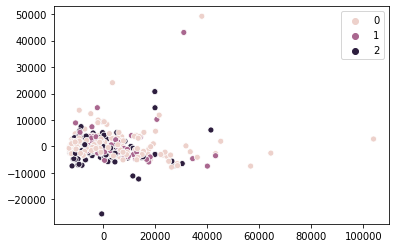

In [30]:
sns.scatterplot(pc1,pc3,hue=df["Clusters"].tolist())

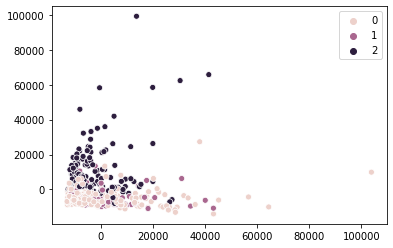

In [31]:
sns.scatterplot(pc1,pc2,hue=df["Clusters"].tolist())

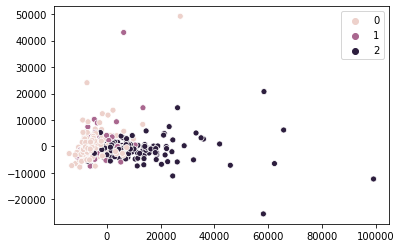

In [32]:
sns.scatterplot(pc2,pc3,hue=df["Clusters"].tolist())

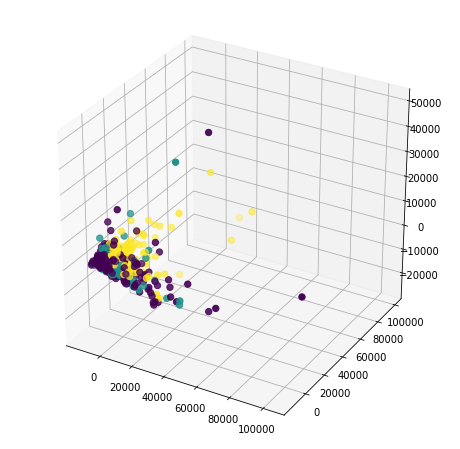

In [33]:
fig=plt.figure(figsize=(8,8))
ax=fig.gca(projection='3d')
ax.scatter(pc1,pc2,pc3,s=40,c=df["Clusters"].tolist())